In [19]:
# 📦 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import re
import joblib
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [20]:
# 🔹 Step 1: Load and Clean Data
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\LLM\spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [21]:
# 🔹 Step 2: EDA (Exploratory Data Analysis)
df['length'] = df['message'].apply(len)
label_counts = df['label'].value_counts()

In [22]:
# Word clouds
spam_words = ' '.join(df[df['label'] == 1]['message'])
ham_words = ' '.join(df[df['label'] == 0]['message'])

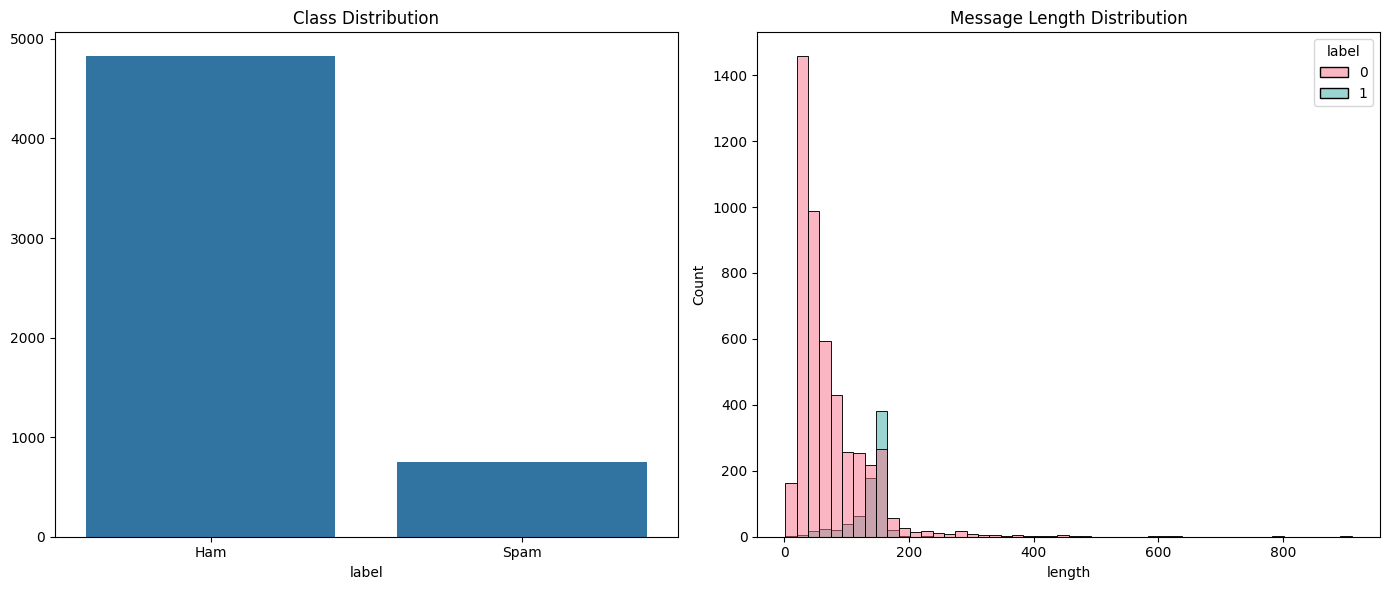

In [23]:
# Show plots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("Class Distribution")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='length', hue='label', bins=50, palette='husl')
plt.title("Message Length Distribution")
plt.tight_layout()
plt.show()

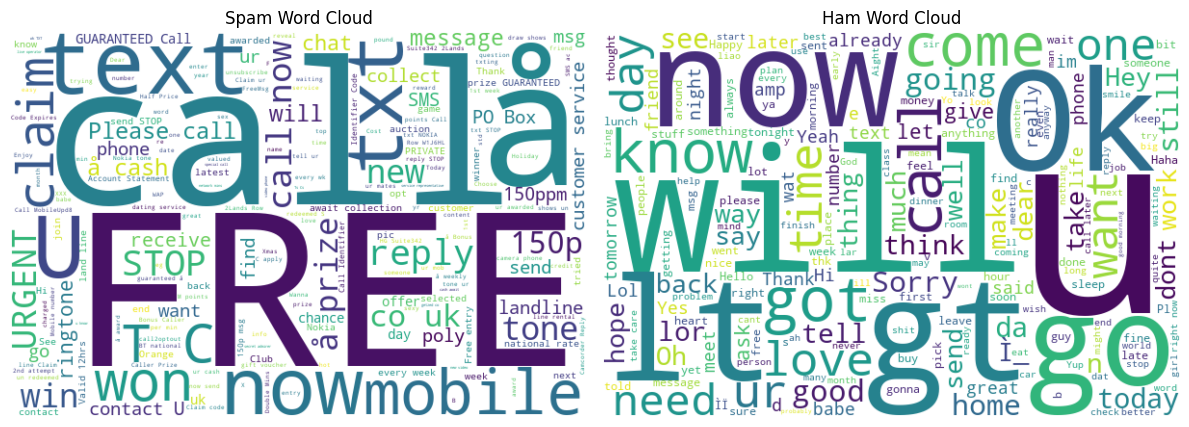

In [24]:
# Word clouds
wc1 = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
wc2 = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.title("Spam Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.title("Ham Word Cloud")
plt.tight_layout()
plt.show()

In [25]:
# 🔹 Step 3: Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['clean_message'] = df['message'].apply(clean_text)

In [26]:
# 🔹 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_message'], df['label'], test_size=0.3, random_state=42)

In [27]:
# 🔹 Step 5: Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [28]:
# 🔹 Step 6: Try Multiple Models
def evaluate_model(model, name):
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    return name, acc, model

results = []
results.append(evaluate_model(MultinomialNB(), "MultinomialNB"))
results.append(evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression"))
results.append(evaluate_model(LinearSVC(), "Linear SVM"))
results.append(evaluate_model(RandomForestClassifier(), "Random Forest"))

MultinomialNB Accuracy: 0.9647
Logistic Regression Accuracy: 0.9486
Linear SVM Accuracy: 0.9797


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Random Forest Accuracy: 0.9713


In [29]:
# 🔹 Step 7: Select Best Model
best_model_info = max(results, key=lambda x: x[1])
best_name, best_acc, best_model = best_model_info
print(f"\n✅ Best Model: {best_name} with Accuracy: {best_acc:.4f}")


✅ Best Model: Linear SVM with Accuracy: 0.9797


In [30]:
# 🔹 Step 8: Final Classification Report
final_preds = best_model.predict(X_test_vec)
print("\nClassification Report:\n")
print(classification_report(y_test, final_preds, target_names=['ham', 'spam']))


Classification Report:

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.98      0.86      0.92       219

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [31]:
# 🔹 Step 9: Build Final Pipeline on Full Data
final_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('svm', LinearSVC())  # use best model name if different
])
final_pipeline.fit(df['clean_message'], df['label'])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svm', LinearSVC())])

In [32]:
# 🔹 Step 10: Save the Final Model
# Save the model
model_path = "sms_spam_classifier_svm.pkl"
joblib.dump(final_pipeline, model_path)

# Streamlit UI feedback
st.success("✅ Final Model Saved Successfully!")
st.info(f"📁 File Location: `{model_path}`")
st.code("Model = TfidfVectorizer + LinearSVC", language="python")
st.markdown("You can now use this model to classify new SMS messages.")

2025-06-29 13:35:01.523 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 13:35:01.525 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 13:35:01.526 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 13:35:01.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 13:35:01.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 13:35:01.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 13:35:01.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 13:35:01.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()